Use part-of-speech tagger to provide the number of verbs, nouns, adjective sand adverbs in each dataframe. Present the result in a table to summarize the result for every dataframe.  Draw wordCloud of cleaned tokens in each dataframe. You may inspire from existing implementations available in Kaggle link (see also https://github.com/amueller/word_cloud).  Discuss the consistency of the content data in each dataframe with the title of the category. (Anh)

In [17]:
import functions_and_variables
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import spacy
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [18]:
#python -m spacy download en_core_web_sm




nlp = spacy.load('en_core_web_sm')
def count_pos(text):
    doc = nlp(text)
    pos_counts = {
        'Noun': 0,
        'Verb': 0,
        'Adjective': 0,
        'Adverb': 0
    }
    for token in doc:
        if token.pos_ == 'NOUN':
            pos_counts['Noun'] += 1
        elif token.pos_ == 'VERB':
            pos_counts['Verb'] += 1
        elif token.pos_ == 'ADJ':
            pos_counts['Adjective'] += 1
        elif token.pos_ == 'ADV':
            pos_counts['Adverb'] += 1
    return pos_counts

datas = {}
for file in ['test_preprocessed','val_preprocessed','train_preprocessed','complete_preprocessed']:
    data = pd.read_csv('categories/{}.csv'.format(file))
    text_data = data['Concatenated_Tweets']
    data['POS_Counts'] = text_data.apply(count_pos)
    datas[file] = data


In [19]:
from tabulate import tabulate



def print_table_pos_tag_result(df_name):
    data = datas[df_name]
    pos_tag_result = data['POS_Counts']
    df = pd.DataFrame(list(pos_tag_result))
    df.insert(0, 'Emotion', data['Category'][df.index])
    table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)
    print("POS COUNT FOR DF {}".format(df_name))
    print(table)

for file in ['complete_preprocessed']:
    print_table_pos_tag_result(file)    
    


POS COUNT FOR DF complete_preprocessed
+----------+-------+-------+-----------+--------+
| Emotion  | Noun  | Verb  | Adjective | Adverb |
+----------+-------+-------+-----------+--------+
|  anger   | 8080  | 6245  |   3134    |  1024  |
|   fear   | 6883  | 5544  |   2690    |  928   |
|   joy    | 21010 | 15452 |   7995    |  2558  |
|   love   | 5352  | 3880  |   1869    |  612   |
| sadness  | 16574 | 13099 |   6498    |  2241  |
| surprise | 2185  | 1666  |    711    |  310   |
+----------+-------+-------+-----------+--------+


WORD CLOUD FOR DATA FRAME complete_preprocessed


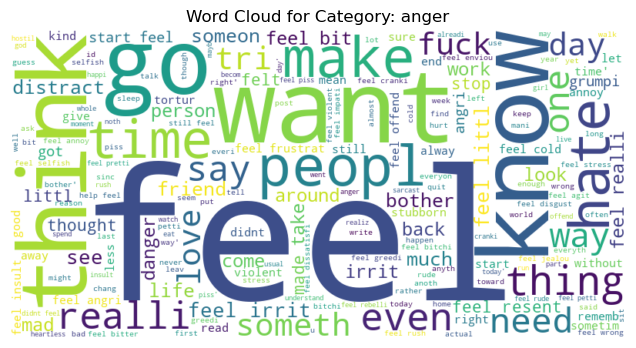

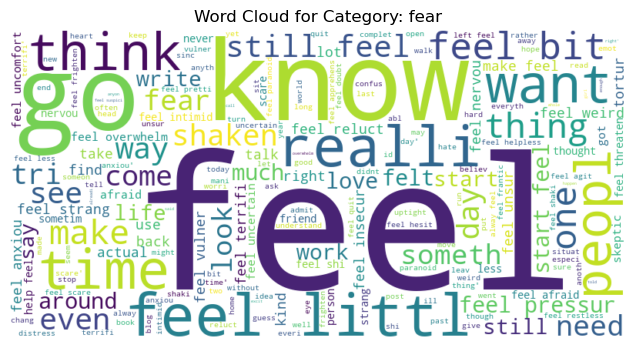

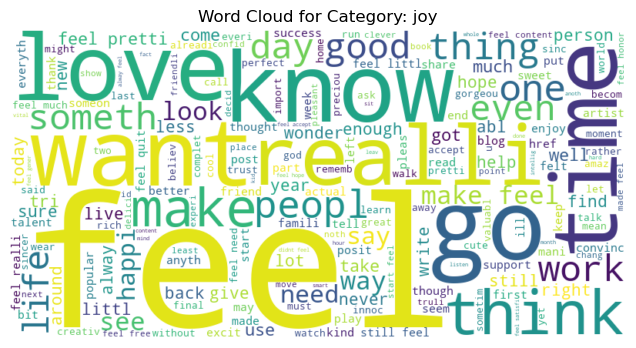

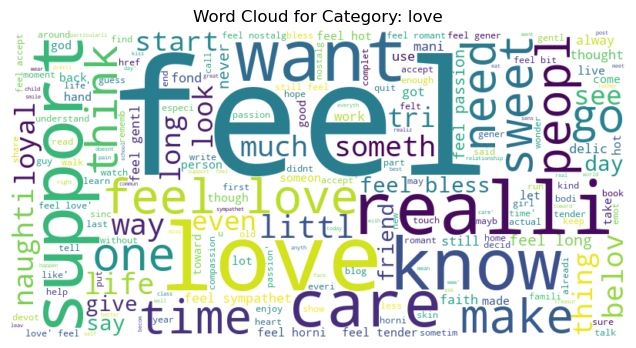

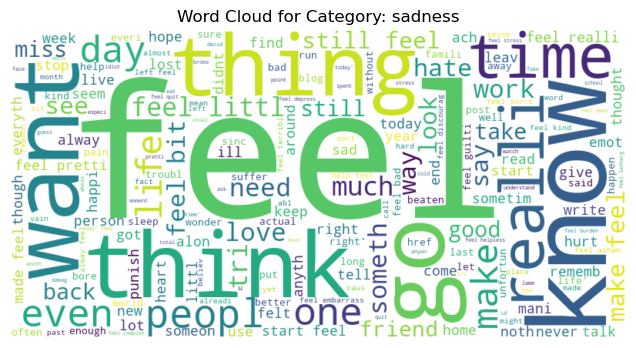

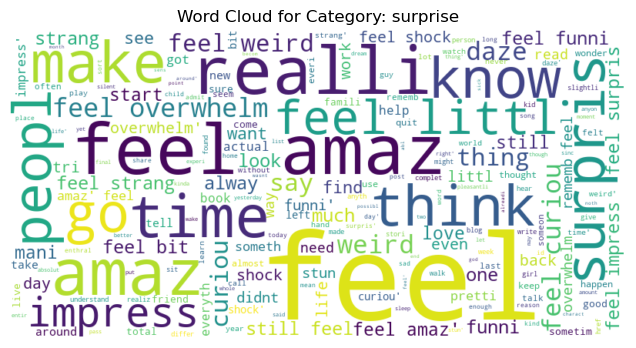

Frequency table:anger
      Word  Frequency
0     feel   1.000000
1     want   0.112360
2     know   0.104635
3    think   0.096208
4       go   0.092697
5    peopl   0.089185
6     make   0.086376
7     hate   0.085674
8     time   0.084972
9    thing   0.083567
10    even   0.077247
11  realli   0.074438
13     one   0.064607
12     say   0.064607
14    need   0.061798
15     way   0.059691
16    love   0.052669
17  someth   0.052669
18     tri   0.051966
19     day   0.051264
Frequency table:fear
          Word  Frequency
0         feel   1.000000
1         know   0.190773
2           go   0.170823
3   feel littl   0.162095
4       realli   0.153367
5         time   0.144638
6         want   0.138404
7        think   0.129676
8        peopl   0.122195
9     feel bit   0.118454
10         one   0.105985
11       thing   0.099751
12        make   0.097257
13  still feel   0.083541
14         see   0.079800
15         way   0.078554
16        even   0.078554
17         day   0.077307
1

In [21]:
wordcloud = WordCloud(width=800, height=400, background_color='white')

df_frequence = pd.DataFrame()

def generate_word_cloud_for_data_frame(file_name):
    global df_frequence
    data = datas[file]
    categories = data['Category']
    tweets = data['Concatenated_Tweets']
    unique_categories = categories.unique()
    save_frequency_data = {}

    for category in unique_categories:
        category_tweets = ' '.join(tweets[categories == category])
        wordcloud.generate(category_tweets)
        word_frequencies = wordcloud.words_
        df = pd.DataFrame(word_frequencies.items(), columns=['Word', 'Frequency'])
        top_words = df.sort_values(by='Frequency', ascending=False).head(20)
        save_frequency_data[category] = top_words
        plt.figure(figsize=(8, 4))
        plt.title(f'Word Cloud for Category: {category}')
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
        wordcloud.to_file("images/{}.png".format(category))

    for key in save_frequency_data:
        print("Frequency table:" + key)
        print(save_frequency_data[key])


for file in ['complete_preprocessed']:
    print("WORD CLOUD FOR DATA FRAME {}".format(file))
    generate_word_cloud_for_data_frame(file)



The verb: Feel and feeling take the majority part in the df. Following by adj that discribe emotions.
For example: <br>
Joy: good, happy, positive, able, thankful,...<br>
Fear: unsure, terrified, reluctant, hesitant, uncertain,...<br>
Surprise: curious, surprise, impressed, amazed,...<br>